# Data Analysis and Logistic Regression

In this project we use [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic), to see how to analysis data and deal with missing data.

The features include Name, Sex, Age, SibSp(number of sibling or husband), Our prediction target is a classification problem: whether the people 'suvival or deceased'.

After data analysis and data cleaning, we will use a logistic model later for the classification.

Finally, we evaluate the resulting model and see the performance.

## Data Analysis and Data Cleaning

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analysis Data

#### 1. Relationship of Survived with Sex

In movie of Titanic, the people in disater let woman escape first. So we will start from examine the relationship between 'Survived' and 'Sex'.

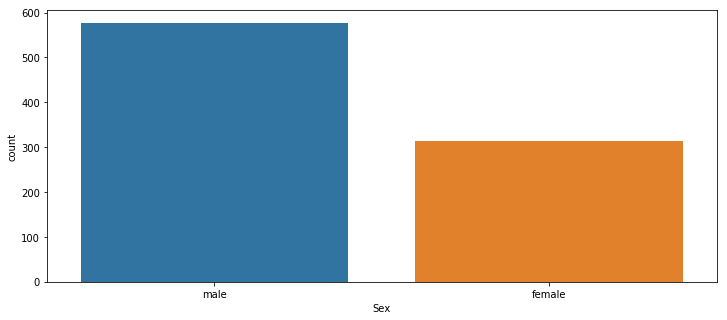

In [60]:
plt.figure(figsize=(12, 5))
sns.countplot(train['Sex'])

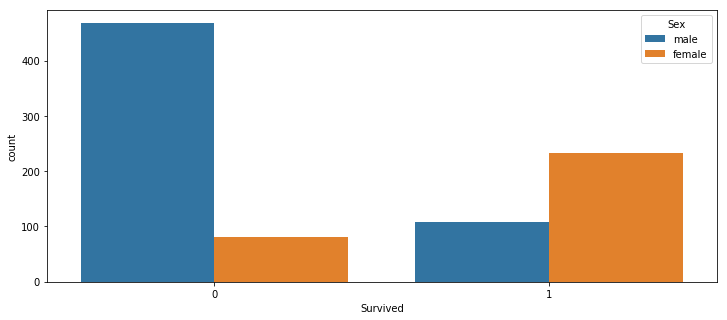

In [61]:
plt.figure(figsize=(12, 5))
sns.countplot(train['Survived'], hue=train['Sex'])

Result: for all people, the number of female is about half of male, but the survival rate of female is about 3 times than male. This might be caused by the fact that the people in Titanic let female escape first.

#### 2. Relationship of Survived with Pclass
A reasonable guess is that they also let people in better class go first.

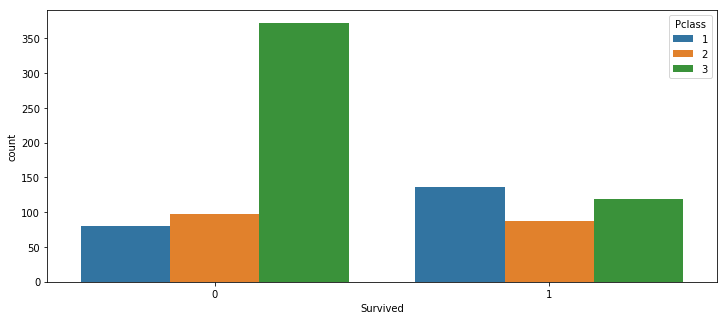

In [62]:
plt.figure(figsize=(12, 5))
sns.countplot(train['Survived'], hue=train['Pclass'])

Result: the 3rd class has much more people than other classes, but most of them died. This confirms our guess that people in higher class have more probability to survive.
    The survival rate would be: people in 1st class > people in 2nd class >> people in 3rd class.

#### 3. Relationship of Survived with Embarked

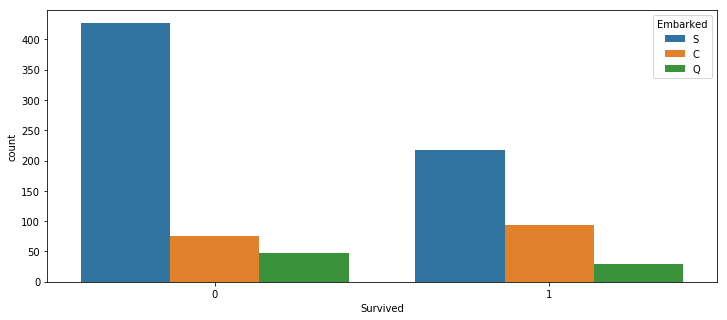

In [63]:
plt.figure(figsize=(12, 5))
sns.countplot(train['Survived'], hue=train['Embarked'])

Result: the result shows that more people depart from S port, but the survial rate of people depart from S port is much lower than people depart from C port. But why? 

To found this, I guess maybe the depart port is related to the class people taken:

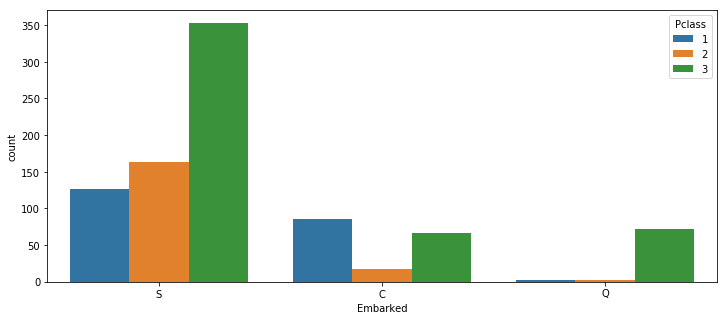

In [64]:
plt.figure(figsize=(12, 5))
sns.countplot(train['Embarked'], hue=train['Pclass'])

Bingo! Most of people in 3rd class depart from S port. And because 3rd class people have much lower survial rate, most people depart from S port died.

#### 4. Relationship of Survived with Age

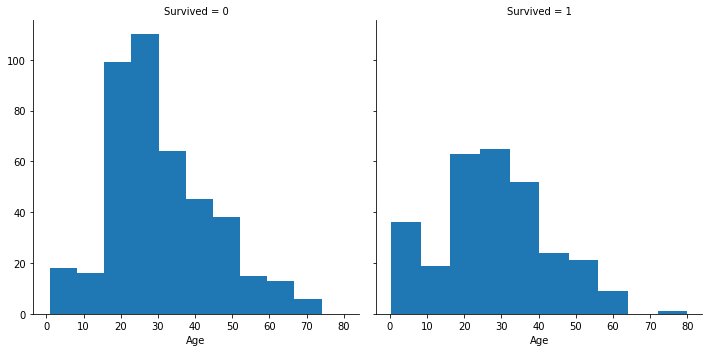

In [65]:
g = sns.FacetGrid(train, col="Survived", size = 5)
g = g.map(plt.hist, "Age")

Result: most people of 20-30 died. That might because 1. they let child to escape first. 2. there are many 'Jack's: male around 20-30 want to try the newest and largest ship, but they don't have much money, so they bought a ticket of 3rd class.

The first idea had been examine by the fact that people around 0-20 have higher survival rate. So we only have to check the second idea:

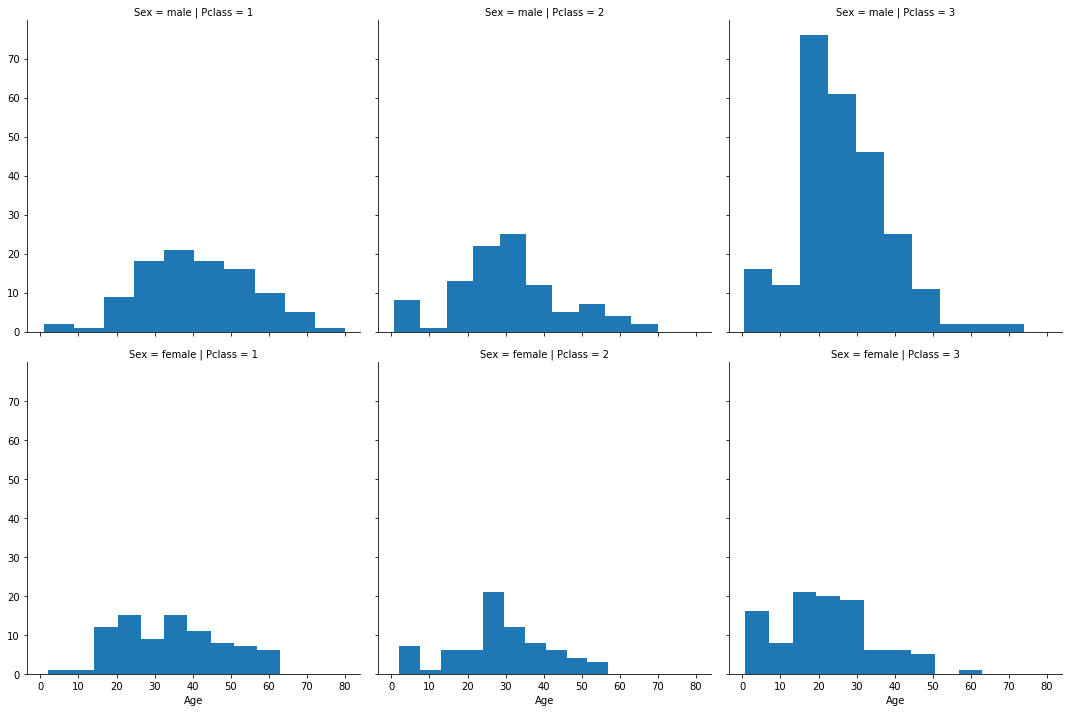

In [66]:
g = sns.FacetGrid(train, col="Pclass", row="Sex", size = 5)
g = g.map(plt.hist, "Age")

#### Conclusion
1. Survival <=> Sex: female's survival rate is 3 times than male's.
2. Survival <=> PClass: people in 3rd class died most. The survival rate is 1st class > 2nd class >> 3rd class.
3. Survival <=> Depart: most 3rd class passengers were departd from S port, causing people depart from S port died most.
4. Survival <=> Age: most people of 20-30 died. It's related to the fact that most 20-30 people bought the 3rd class ticket.




### Missing Data
Use **Seabon's heatmap** to check missing data quickly.

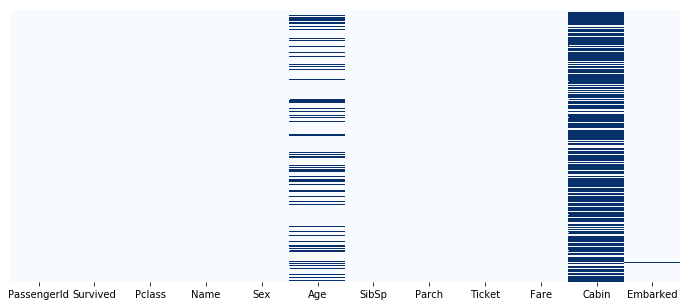

In [67]:
plt.figure(figsize=(12, 5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Blues') 
# yticklabels : tick in the left side 
# cbar: color bar, which is none in this case
# cmap: color of the map. error message gives a list of cmap values.

Count Number of Missing data:

In [68]:
## count number of missing rows:
_sum = sum(train['Age'].isnull().tolist())
loss_rate = _sum / len(train['Age'])
print(loss_rate)

0.19865319865319866


For 'Age' column, 20% of data is missing = small lossing rate for **reasonable replacement** with some form of imputation. 
For 'Cabin' column, we missed too much data = probably **drop** this later, or **change it to another feature like "Cabin Known: 1 or 0"**


### Fill in the Age Data

To fill in data, we need to know the relationship of 'age' with other features. 
So we need to check data and find what is 'age' related to.
As we showed in previous section, most 3rd class people were around 20-30. Therefore we will start from this point.

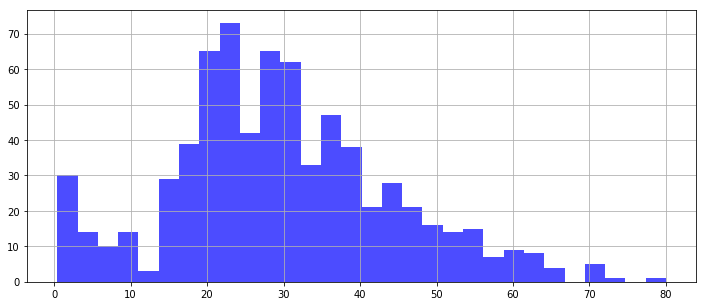

In [69]:
plt.figure(figsize=(12, 5))
train['Age'].hist(bins=30,color='blue',alpha=0.7)

Maybe age effects the PClass (becasue older people has more money?), so we have:

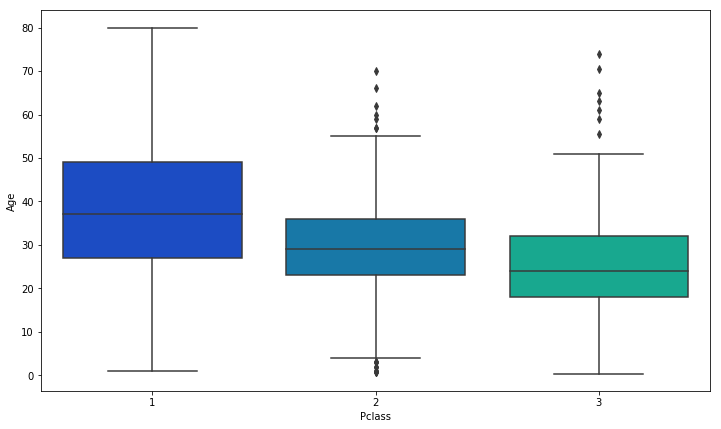

In [70]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Therefore, we can use the **average age** for each 'Pclass' to fill in the missing 'age' data:

In [71]:
def fillin_age(col):
    dict_pclass_age = {1:37, 2:30, 3:25}
    age    = col[0]
    pclass = col[1]
    if pd.isnull(age):
        return dict_pclass_age[pclass]
    else:
        return age

In [72]:
train['Age'] = train[['Age','Pclass']].apply(fillin_age,axis=1)

By the fillin_age function, we can fillin the age data. Let us check the fillin result by the heatmap:

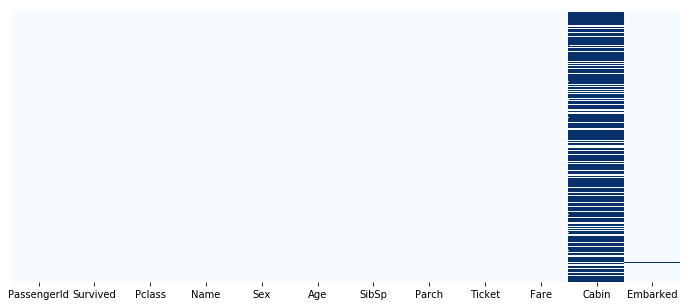

In [73]:
plt.figure(figsize=(12, 5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Blues') 

The benefit of the average age method, is our trend between Pclass and age doesn't changed:

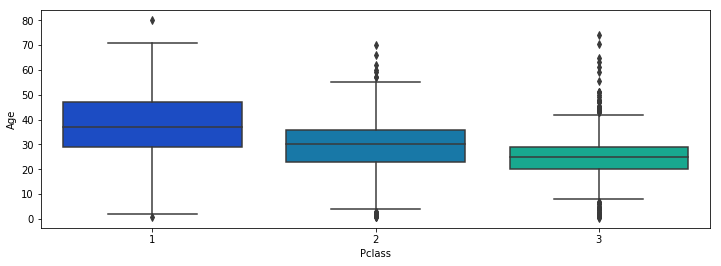

In [76]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

And the price of fillin, is that we have different age distribution in our data set. (compare to the original age distribution which would not be real too because of the NaN rows)

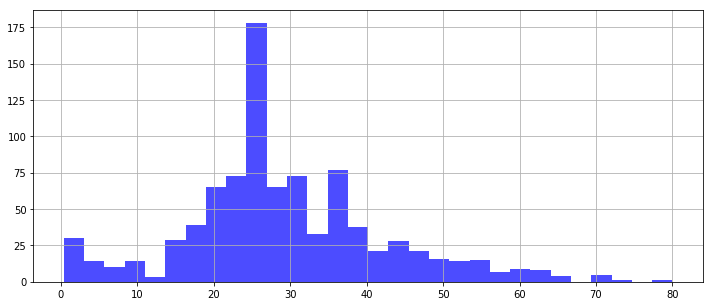

In [77]:
plt.figure(figsize=(12, 5))
train['Age'].hist(bins=30,color='blue',alpha=0.7)

## Drop the Cabin Column

In [78]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Convert Categorical Features 

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


By the train.info(), we can know the categorical features are **Object : 'Name', 'Sex', 'Ticket', 'Embarked'**
Because our prediction target is 'suvival or deceased', and **Name** and **Ticket** is relevant for this topic, so we're going to:
1. Add dummy data for 'Sex' and 'Embarked'
2. Drop the 'Name' and 'Ticket' Column

In [80]:
# Get dummy for sex and embarked
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
# Drop 'Sex','Embarked','Name','Ticket' columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
# Concat 'Sex','Embarked' with dummy data into train
train = pd.concat([train,sex,embark],axis=1)

In [81]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [82]:
train.to_csv('titanic_train_cleaned.csv', index = False)

## Logistic Regression

In [83]:
train = pd.read_csv('titanic_train_cleaned.csv') 
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Split Train / Test Data

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=1126)

### Training

In [85]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction and Evaluation

In [86]:
pred = logReg.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0], dtype=int64)

1. By Mean Absolute Error (MAE)

In [87]:
np.average(np.abs(pred - y_test))

0.2111111111111111

2. By Class Report

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84        58
          1       0.74      0.62      0.68        32

avg / total       0.79      0.79      0.78        90



### Conclusion

In this expriment, we use [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic) dataset. After cleaning the dataset, we use logistic regression to fit the data. However, the evaluation result turns out that the logistic regression's mean absolute error is 0.21, which means the logistic regression didn't fit the sample very well. So the todo is to explore more model suitable for this problem.

## Reference


[Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)

[\[資料分析&機器學習\] 第4.1講 : Kaggle競賽-鐵達尼號生存預測(前16%排名)](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077)
